In [752]:
import pandas as pd
import numpy as np

In [753]:
# Import dataset
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')
df2 = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

liste_var = [#'mt_dec_cum_IMP_tot','EAD_1an_avant_def','cum_frs_externes','fl_prise_de_gar', 'cum_rec', 'fam_ETH', 'CD_DNE_CHR_LGD_SAIN','CD_MTF_ENE_CTX',
             # anciennes variables ->
             'CD_NATUR_OP_PFI', 'CD_SITFAM_EMP1', 'sol_echec', 'CD_MTF_DFC', 'regroup_natur_op', 'fam_PCD', 'fl_prise_de_gar', 'mt_dec_cum_IMP_tot', 'dat_dec_echec', 'fam_ENQ',
 'niv_gravite_mtf_dne', 'fl_fam_vam', 'fl_pass_DET', 'arrete', 'cd_op']

liste_var = list(set(liste_var))
# Variables selctionnées
df = df[liste_var]#'CD_NAT_EMP1', 'CD_NAT_EMP2','CD_CSP_EMP2' trop de NaN pour ces var ,'CD_DEST_PFI',  'CD_CSP_EMP1'

# Peut etre drop CSP et DEST car on peut pas regrouper les categories

'MT_CHA_PIP', 'FL_ETR', 'cum_frs_externes', 'MT_EAD_RESID',
       'fl_prise_de_gar', 'fam_ETH', 'fam_ENQ', 'fam_hyp', 'dat_dec_echec',
       'solution', 'fam_PCD', 'dtSRT1st', 'CD_MTF_ENE_CTX',
       'niv_gravite_mtf_dne', 'niv_gravite_mtf_dfs', 'dls_mep_entree_def',
       'nb_bienHOP', 'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'fl_def_ss_pass_CTX',
       'mt_dec_cum_IMP_tot', 'AMI', 'PTG', 'AGE_EMP2',

# DataTreatment

In [754]:
df['niv_gravite_mtf_dne'] = df['niv_gravite_mtf_dne'].astype('object')

In [755]:
df['arrete'] = pd.to_datetime(df['arrete'])

C:\Users\baheu\AppData\Local\Temp\ipykernel_11088\2871220427.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])


In [756]:
liste_det = df[df['fl_pass_DET'] == 1]['cd_op']

# on applique le det ou non à toutes les lignes des indiv pour ne garder que la première ligne par individu et garder l'info du passage en DET ou non

df['DET'] = np.where(df['cd_op'].isin(liste_det), 1, 0)

In [757]:
liste_det = df2[df2['fl_pass_DET'] == 1]['cd_op']

# on applique le det ou non à toutes les lignes des indiv pour ne garder que la première ligne par individu et garder l'info du passage en DET ou non

df2['DET'] = np.where(df2['cd_op'].isin(liste_det), 1, 0)

Ensuite on va supprimer les individus qui n'ont qu'une ligne dans le dataframe car ce sont des anomalies.

In [758]:
anomalie = (df['cd_op'].value_counts() ==1)
anomalie = pd.DataFrame(anomalie)
liste_anomalie = anomalie[anomalie['count']==True].index

In [759]:
df['anomalie'] = np.where(df['cd_op'].isin(liste_anomalie), 1, 0)

In [760]:
df = df[df['anomalie'] == 0]

In [761]:
df.drop(columns = ['fl_pass_DET','anomalie'], inplace = True)

In [762]:
df.drop_duplicates(subset = 'cd_op', inplace = True , keep = 'first')

In [763]:
df['DET'].value_counts()

DET
0    15500
1     7193
Name: count, dtype: int64

In [764]:
df.shape

(22693, 21)

# Regroupement de categories 

### Motif

In [765]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df.drop(columns ='CD_MTF_DFC', inplace = True)

# Gravite

In [766]:
precaire = [2.0]
df['niv_gravite_mtf_dne'] = np.where(df['niv_gravite_mtf_dne'].isin(precaire), 'Grave', 'Pas grave')

### CD_SITFAM_EMP1

In [767]:
precaire = ['I','D','C'] 

df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

df.drop(columns ='CD_SITFAM_EMP1', inplace = True)

### CD_NATUR_OP_PFI

In [768]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']

df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='CD_NATUR_OP_PFI', inplace = True)

## Sol_echec

In [769]:
precaire = ['0_1', '1_1']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

df.drop(columns ='sol_echec', inplace = True)

## Nature operation

In [770]:
precaire = ['4_autre']

df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='regroup_natur_op', inplace = True)

# MTF

In [771]:
precaire = [102.0]
df['MTF'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df.drop(columns ='CD_MTF_ENE_CTX', inplace = True)

# Index

In [772]:
df.index = df['cd_op']
df.drop(columns = 'cd_op',inplace = True)

# Encoding

### Label encoding pour modalités ayant une relation ordinale

In [773]:
df['niv_gravite_mtf_dne'] = df['niv_gravite_mtf_dne'].apply(lambda x : 1 if x == 'Grave' else 0)
df['niv_gravite_mtf_dne'] = df['niv_gravite_mtf_dne'].astype('int')

# OHE pour le reste

In [774]:
for col in df.select_dtypes(include = 'object').columns:
    dummies_df = pd.get_dummies(df[col], prefix=f'{col}')
    
    df = pd.concat([df, dummies_df], axis=1)
    
    df.drop(columns = col, inplace = True)

Il faudra penser à drop une colonne pour chaque variable categorielle pour qu'elle soit considérée comme modalité de reference pour eviter les pb de multicolinéarité.

In [775]:
df.columns

Index(['EAD_1an_avant_def', 'dat_dec_echec', 'arrete', 'fl_fam_vam',
       'cum_frs_externes', 'CD_DNE_CHR_LGD_SAIN', 'niv_gravite_mtf_dne',
       'fam_ETH', 'fam_ENQ', 'cum_rec', 'fam_PCD', 'fl_prise_de_gar',
       'mt_dec_cum_IMP_tot', 'DET', 'Motif_Motif mauvais', 'Motif_Motif moyen',
       'Motif_Motif tres mauvais', 'Situation_fam_Bonne situation',
       'Situation_fam_Mauvaise situation', 'Nature_Bonne nature',
       'Nature_Mauvaise nature', 'Solution_echec_Bonne solution',
       'Solution_echec_Mauvaise solution', 'Nature_op_Bonne nature',
       'Nature_op_Mauvaise nature', 'MTF_Bon MTF', 'MTF_Mauvais MTF'],
      dtype='object')

# Var numériques

In [776]:
df.isna().sum()

EAD_1an_avant_def                   2
dat_dec_echec                       0
arrete                              0
fl_fam_vam                          0
cum_frs_externes                    0
CD_DNE_CHR_LGD_SAIN                 2
niv_gravite_mtf_dne                 0
fam_ETH                             0
fam_ENQ                             0
cum_rec                             0
fam_PCD                             0
fl_prise_de_gar                     0
mt_dec_cum_IMP_tot                  0
DET                                 0
Motif_Motif mauvais                 0
Motif_Motif moyen                   0
Motif_Motif tres mauvais            0
Situation_fam_Bonne situation       0
Situation_fam_Mauvaise situation    0
Nature_Bonne nature                 0
Nature_Mauvaise nature              0
Solution_echec_Bonne solution       0
Solution_echec_Mauvaise solution    0
Nature_op_Bonne nature              0
Nature_op_Mauvaise nature           0
MTF_Bon MTF                         0
MTF_Mauvais 

In [777]:
for col in df.select_dtypes(include = 'bool').columns : 
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [778]:
df

,EAD_1an_avant_def,dat_dec_echec,arrete,fl_fam_vam,cum_frs_externes,CD_DNE_CHR_LGD_SAIN,niv_gravite_mtf_dne,fam_ETH,fam_ENQ,cum_rec,...,Situation_fam_Bonne situation,Situation_fam_Mauvaise situation,Nature_Bonne nature,Nature_Mauvaise nature,Solution_echec_Bonne solution,Solution_echec_Mauvaise solution,Nature_op_Bonne nature,Nature_op_Mauvaise nature,MTF_Bon MTF,MTF_Mauvais MTF
cd_op,,,,,,,,,,,,,,,,,,,,,
I860708600,1121.38,0,2017-01-31,0,5295.06,2.0,1,0,0,4173.79,...,1,0,1,0,1,0,1,0,1,0
I950404213,2475.00,0,2017-03-31,0,4302.96,1.0,1,0,0,0.00,...,1,0,0,1,1,0,0,1,0,1
I950706618,870.00,0,2016-08-31,0,0.00,1.0,1,0,0,0.00,...,1,0,0,1,1,0,0,1,0,1
I950901248,525.06,0,2017-01-31,0,0.00,2.0,1,0,0,0.00,...,0,1,0,1,1,0,0,1,0,1
I960300578,815.46,0,2016-06-30,0,0.00,1.0,1,0,0,0.00,...,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M220200817,143614.00,0,2022-09-30,0,0.00,2.0,0,0,0,0.00,...,1,0,0,1,1,0,0,1,1,0
M220207473,441508.00,0,2022-04-30,0,0.00,2.0,0,0,0,0.00,...,1,0,0,1,1,0,0,1,1,0
M220330795,372182.00,0,2022-04-30,0,0.00,2.0,0,0,0,0.00,...,1,0,0,1,1,0,0,1,1,0


# Export du dataframe 

In [779]:
df.to_csv('../data/df.csv', sep = ',')

# Discretisation var num

In [780]:
df2.drop_duplicates(subset = 'cd_op', inplace = True, keep = 'first')

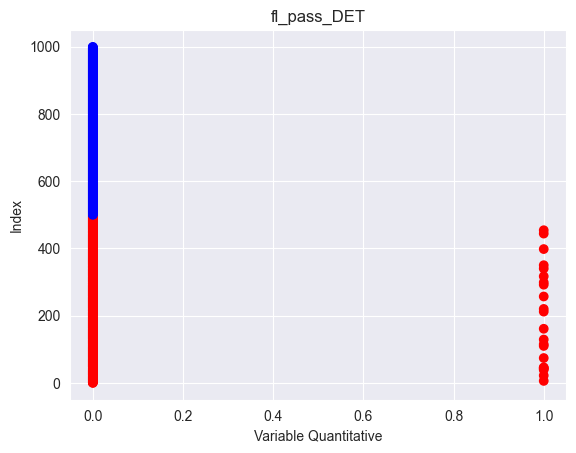

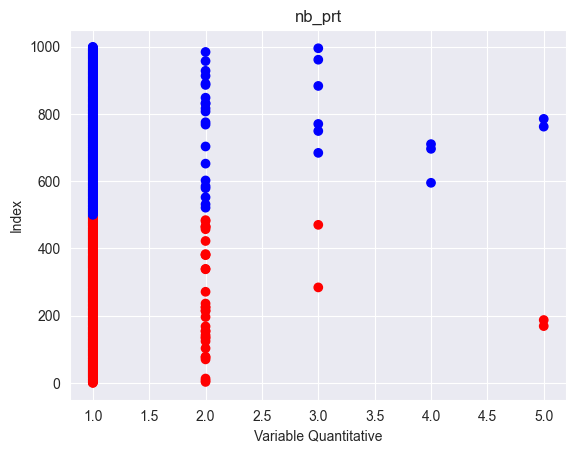

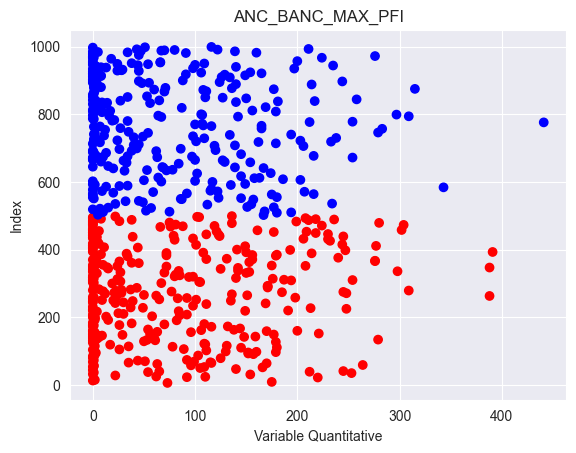

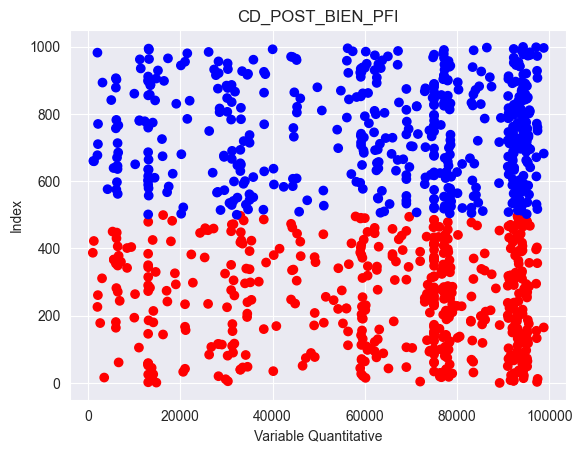

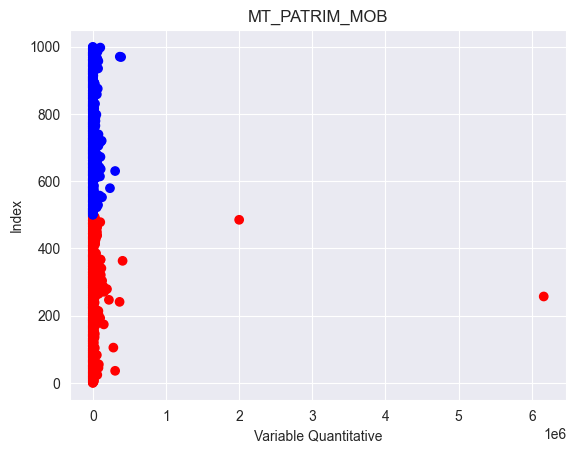

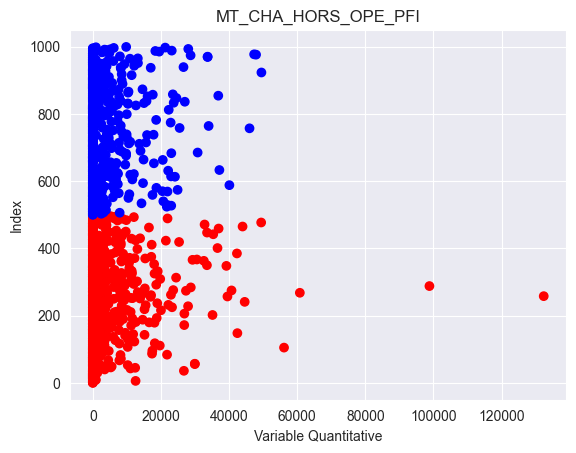

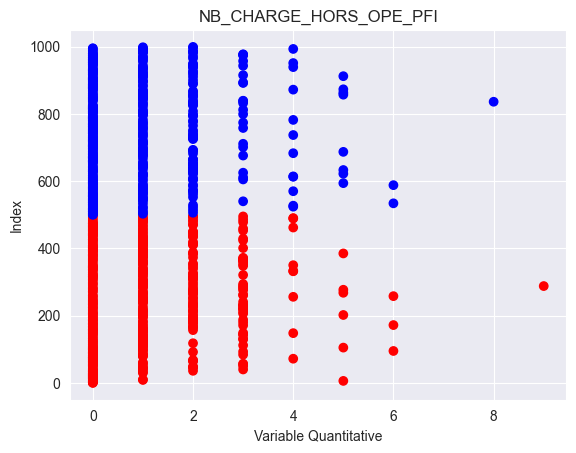

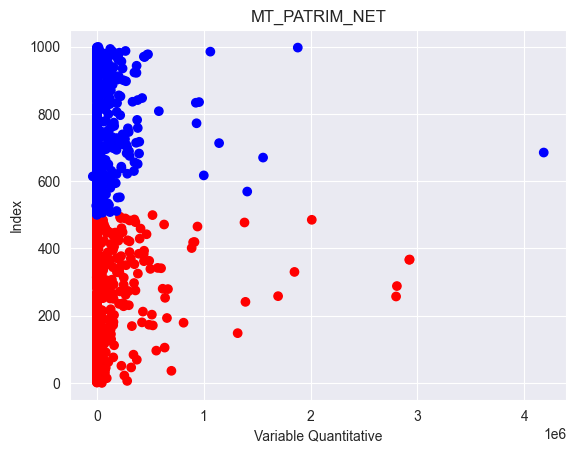

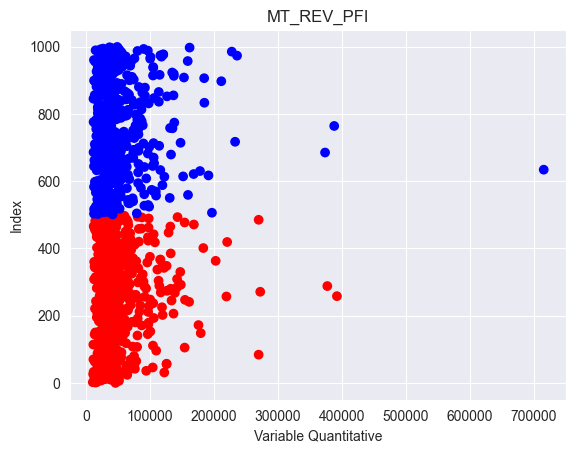

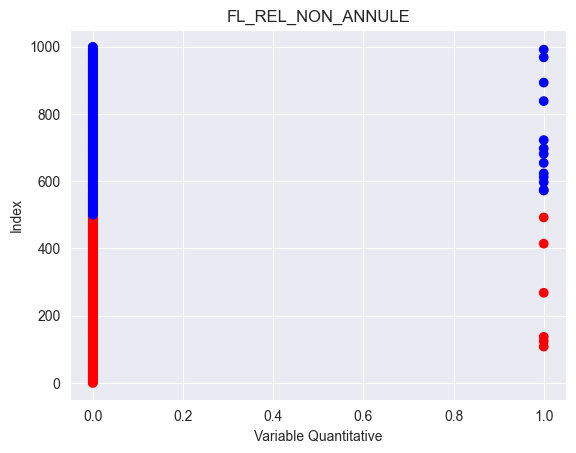

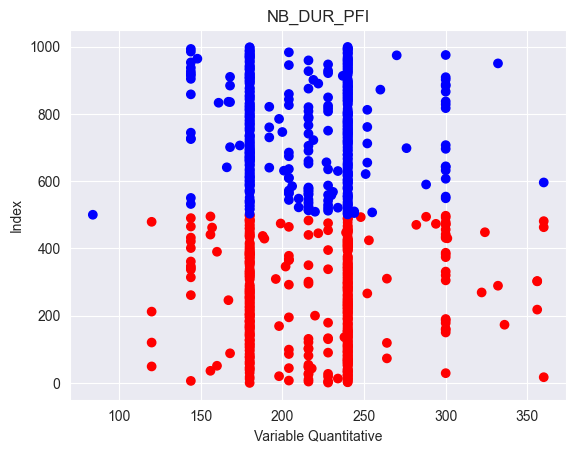

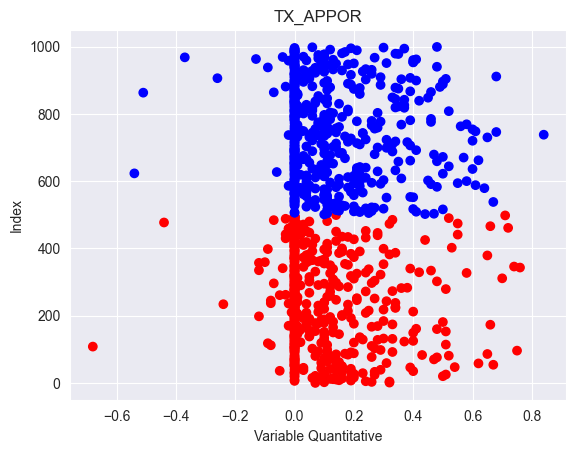

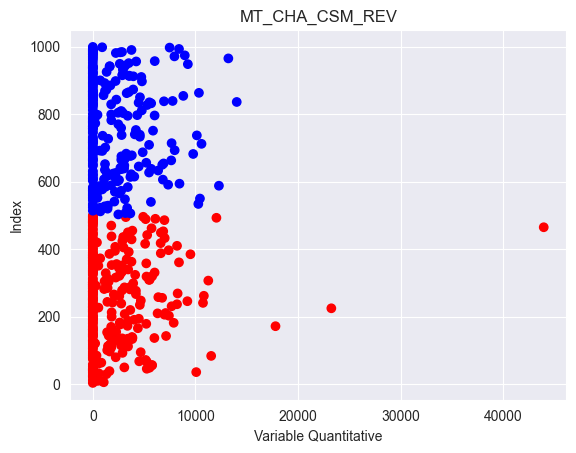

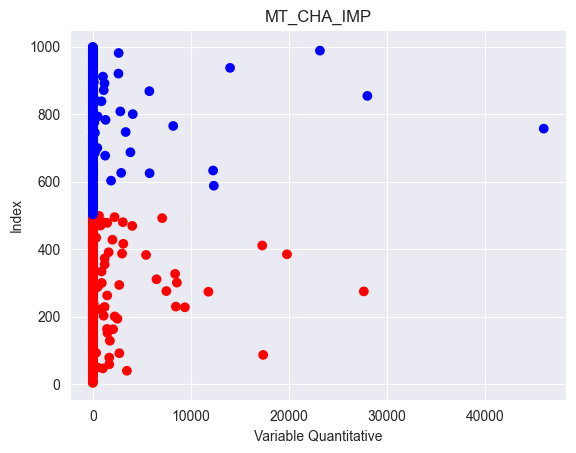

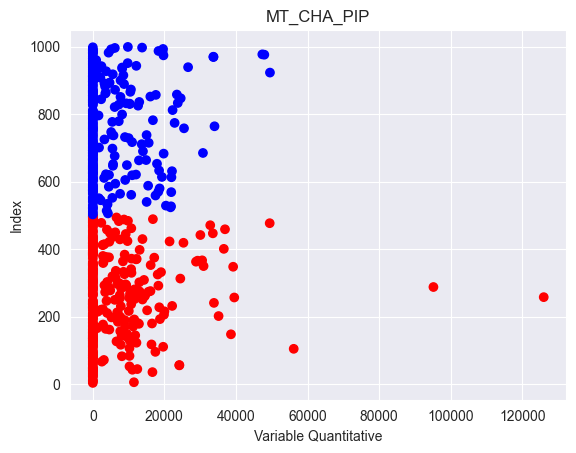

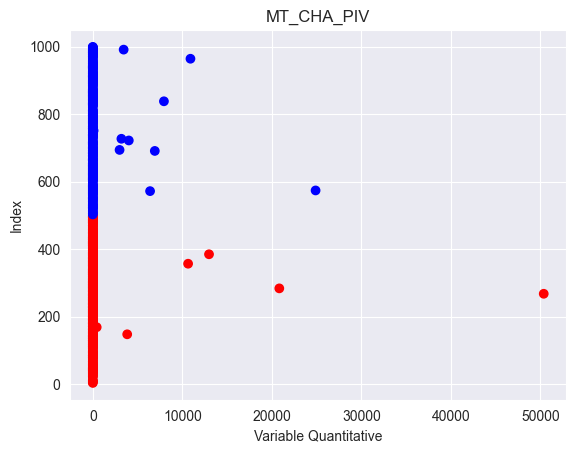

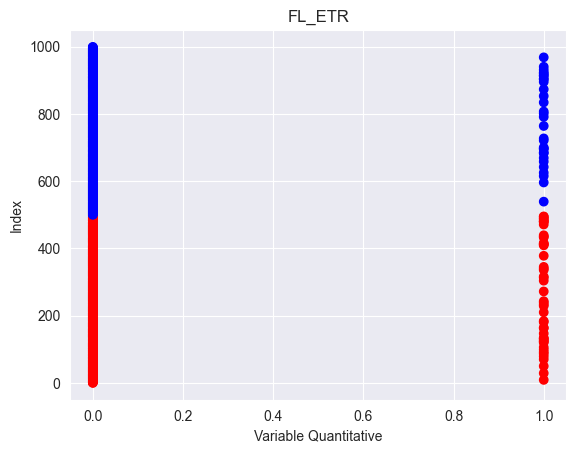

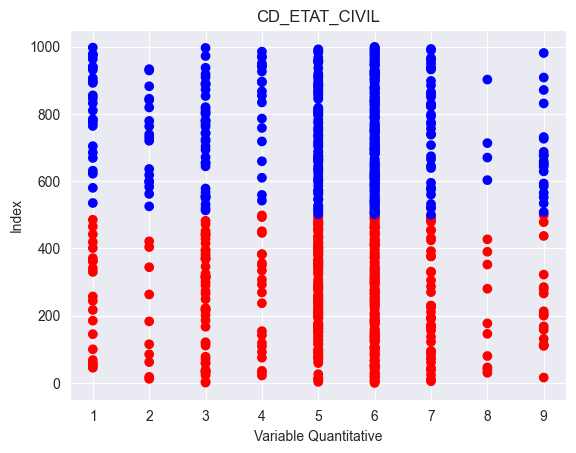

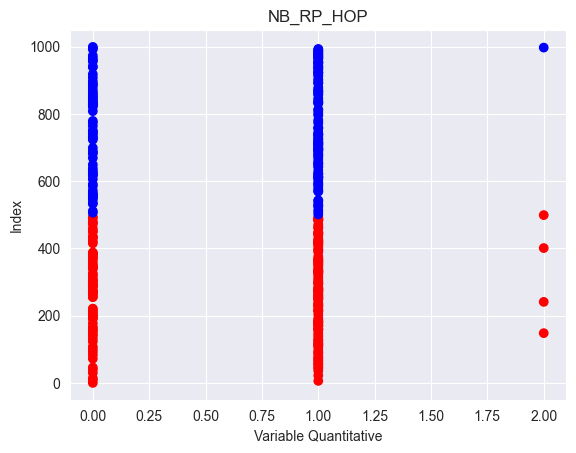

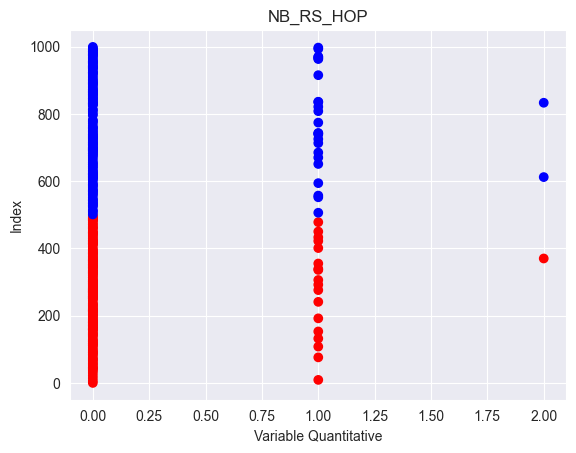

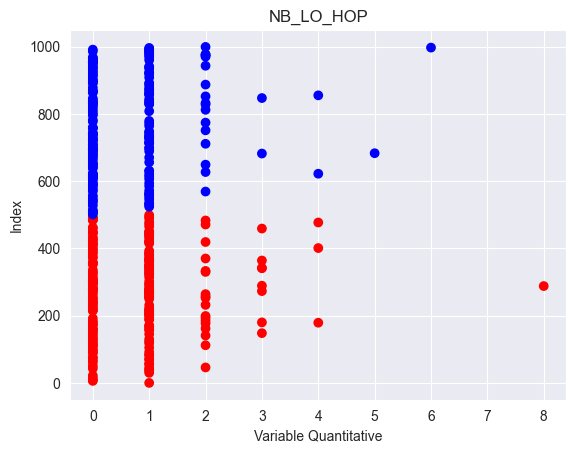

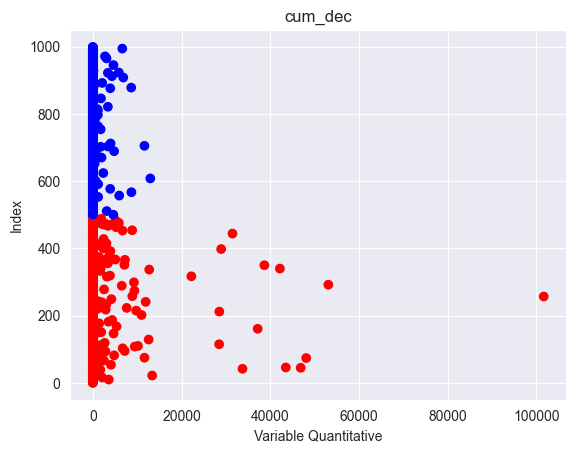

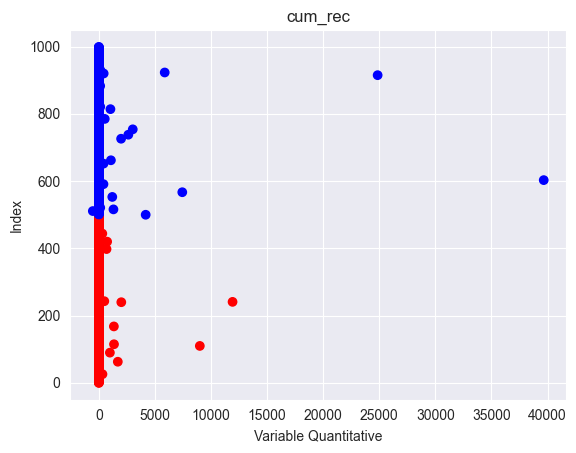

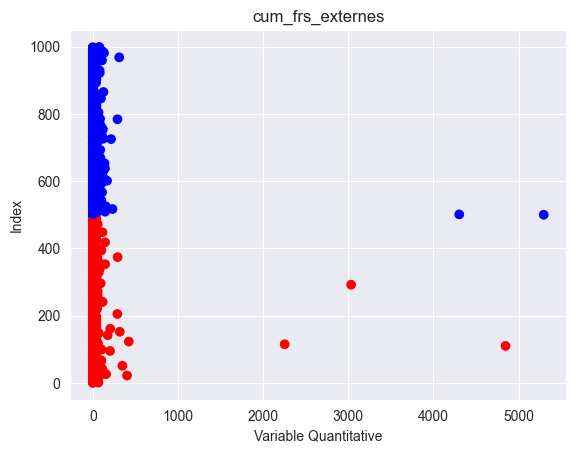

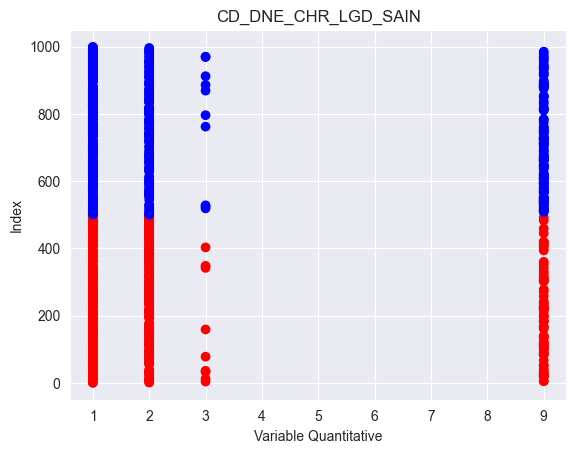

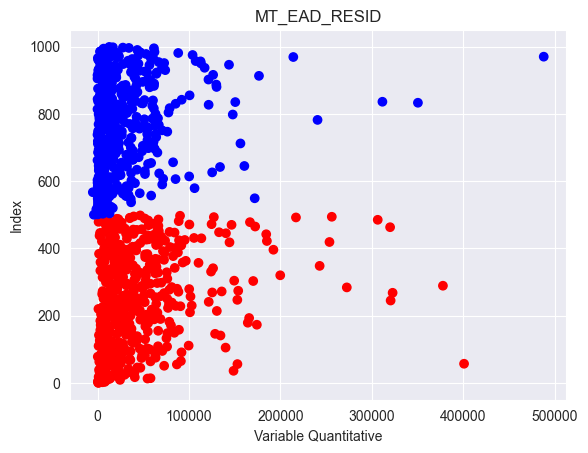

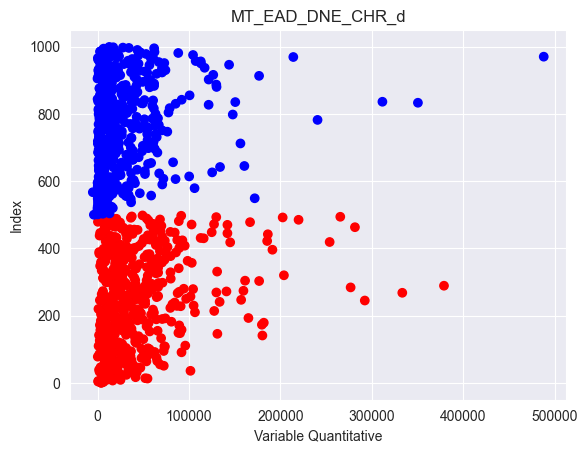

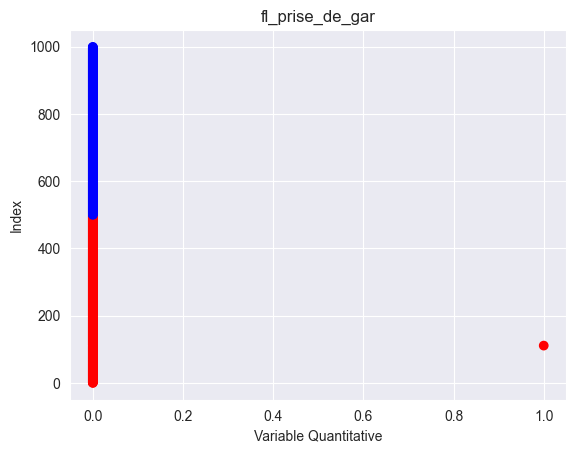

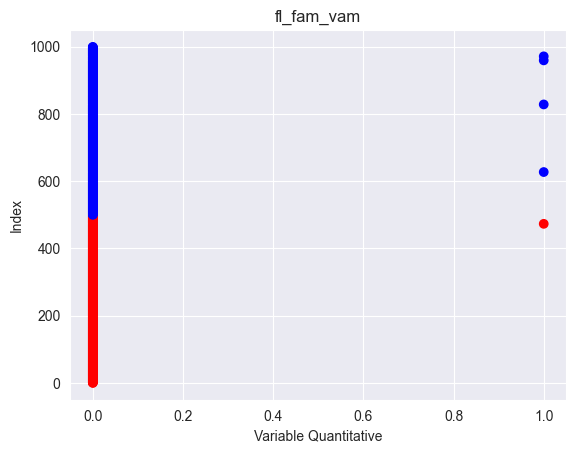

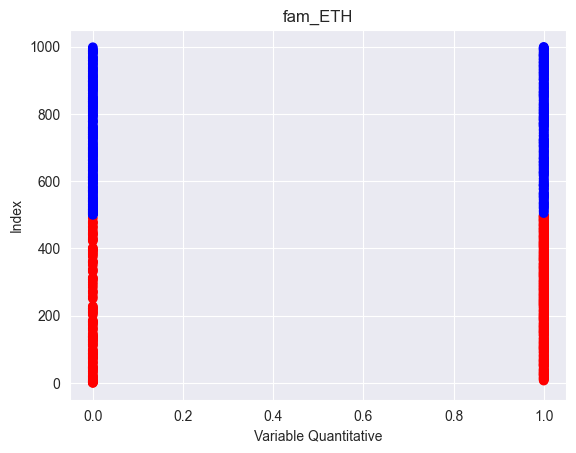

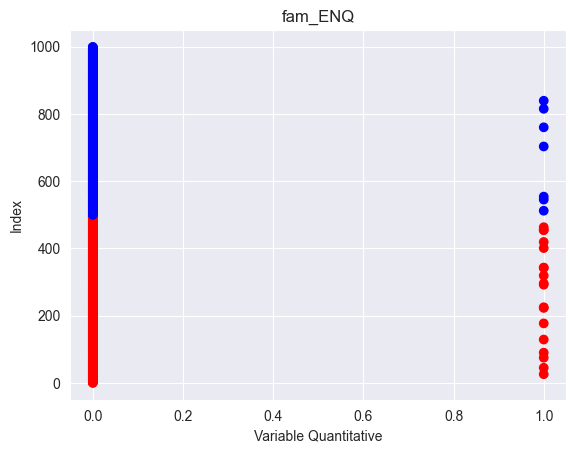

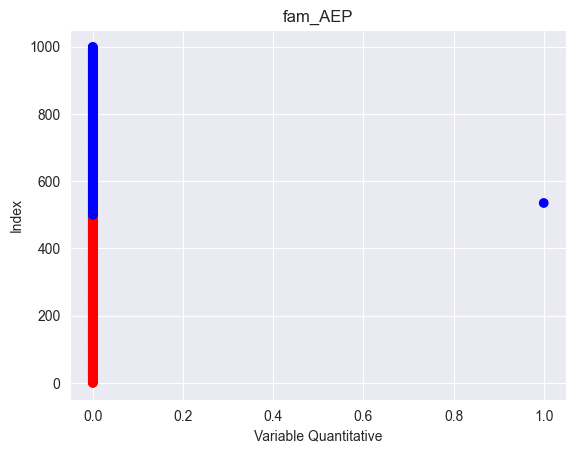

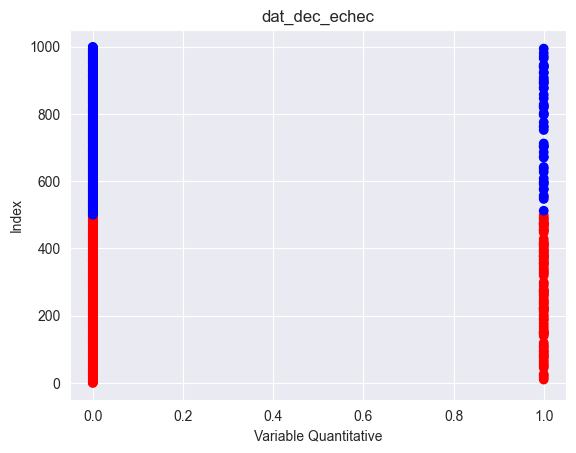

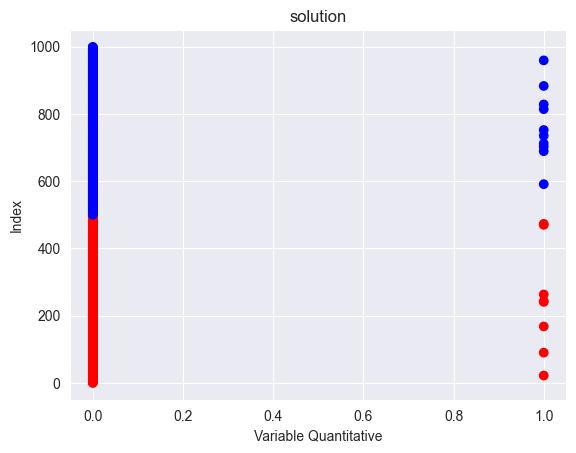

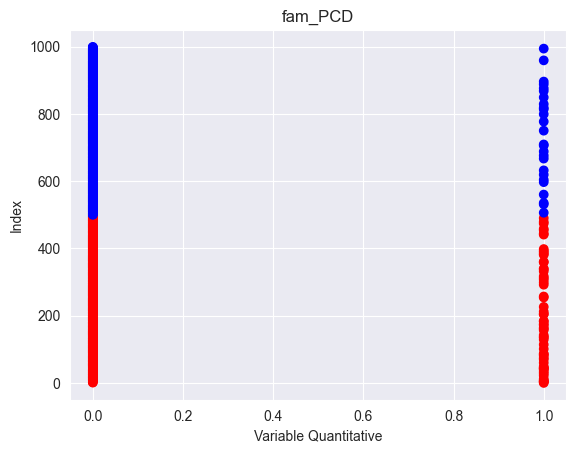

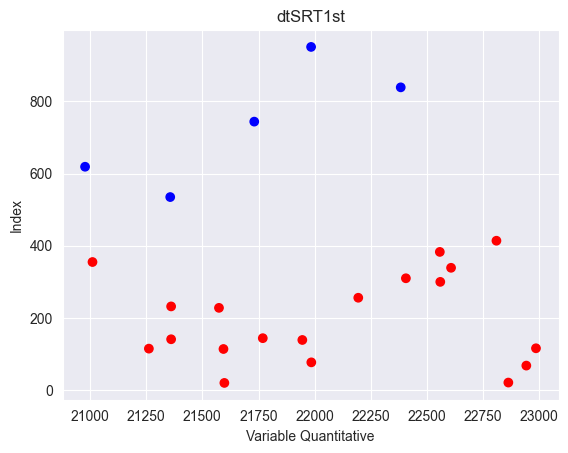

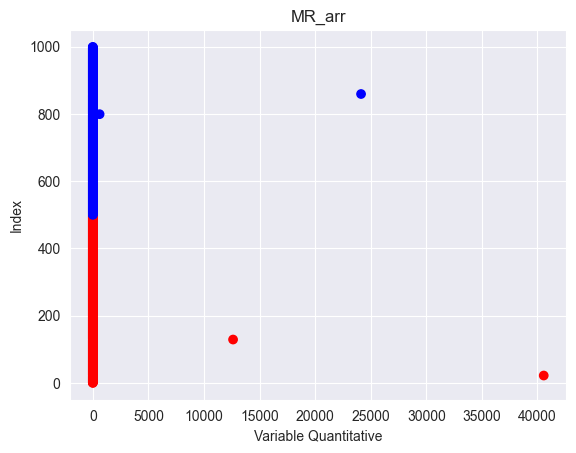

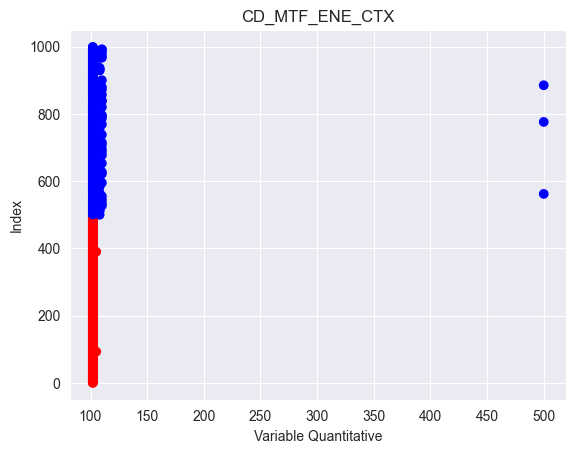

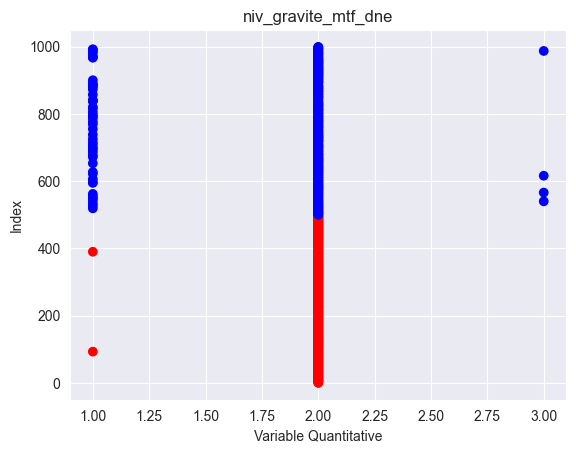

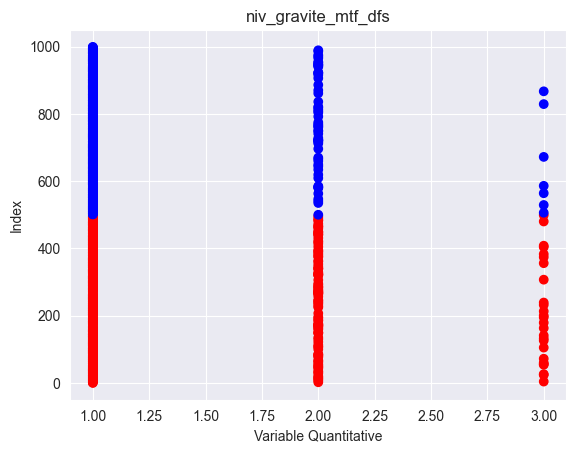

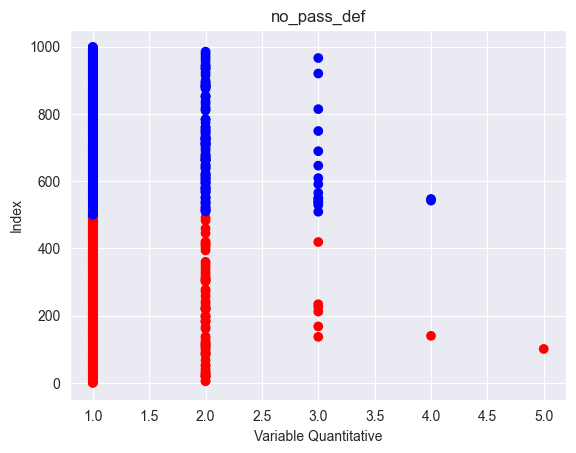

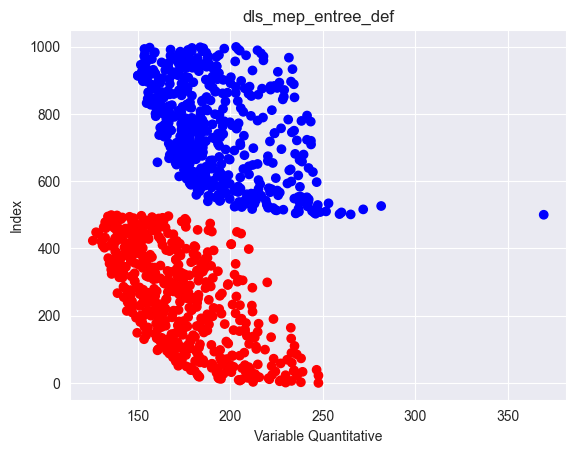

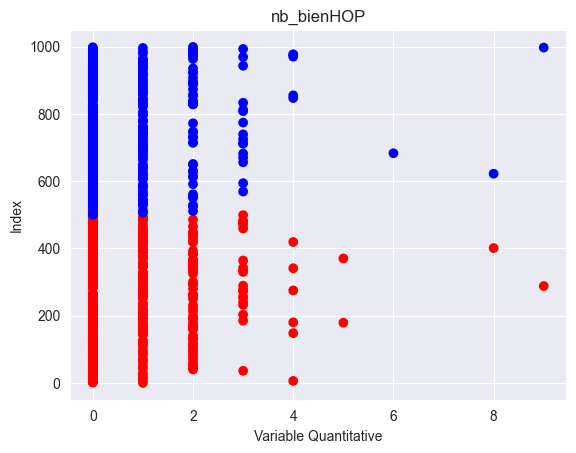

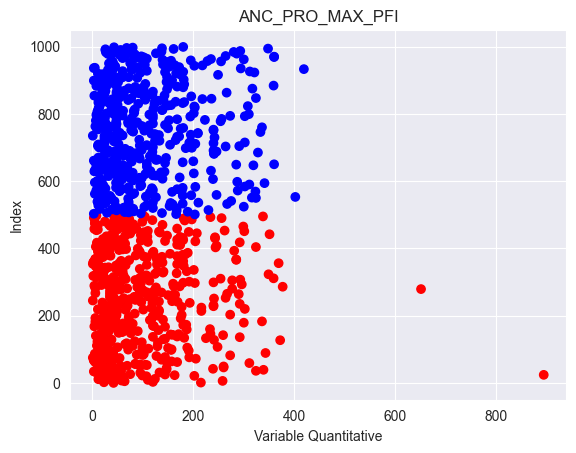

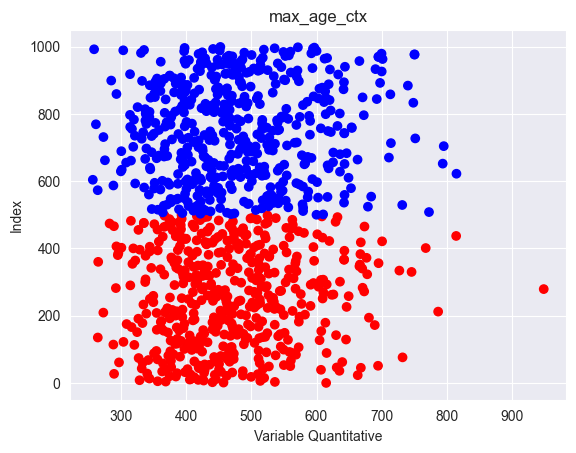

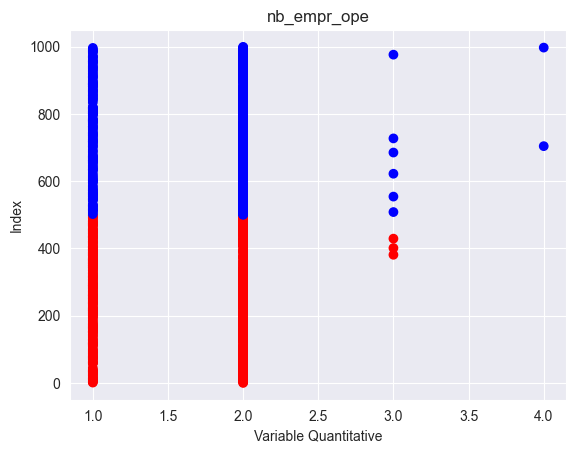

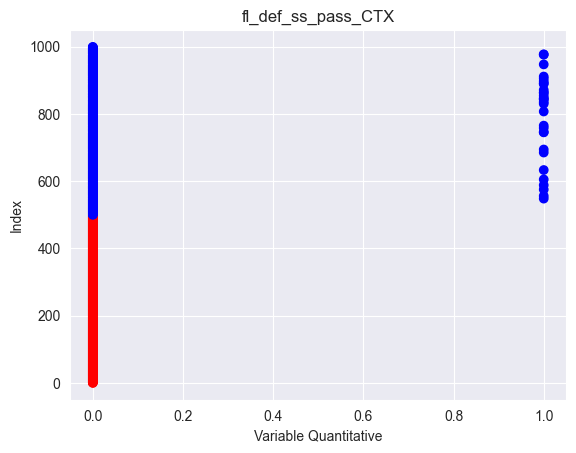

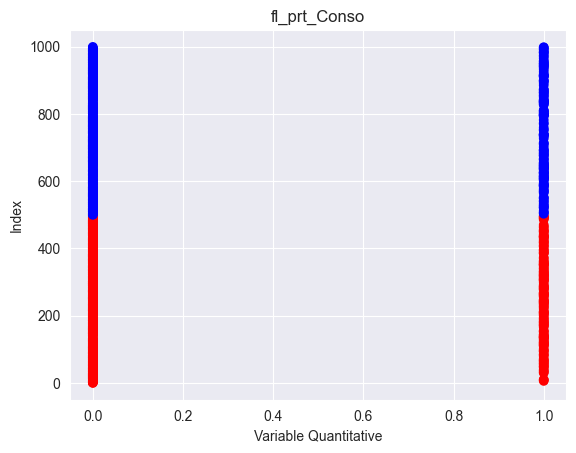

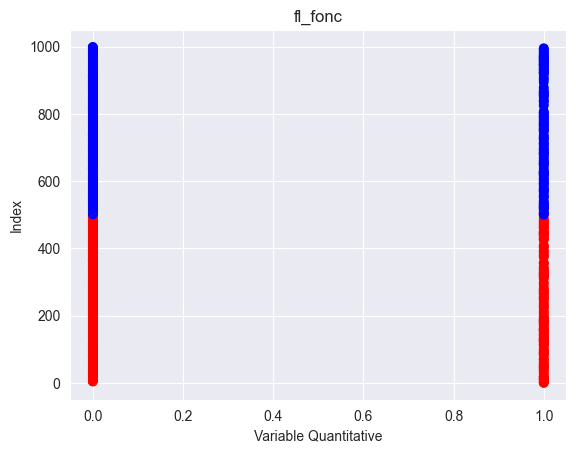

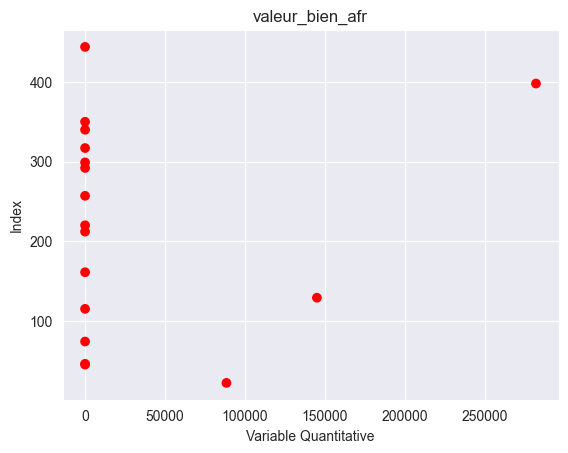

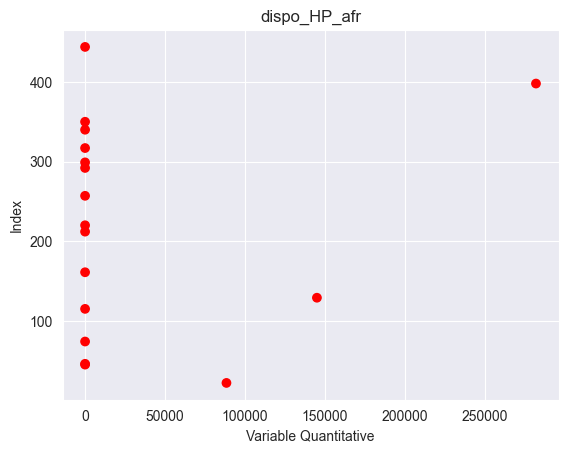

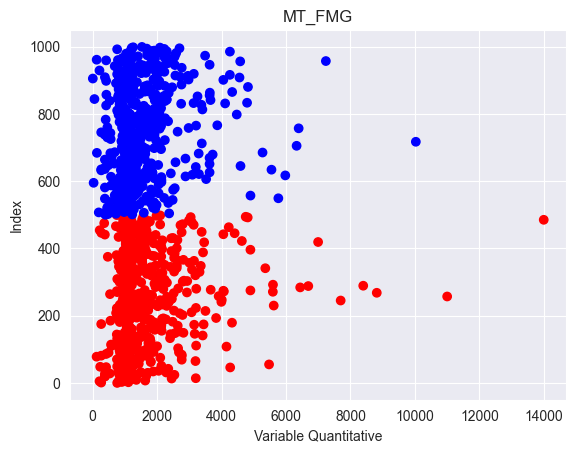

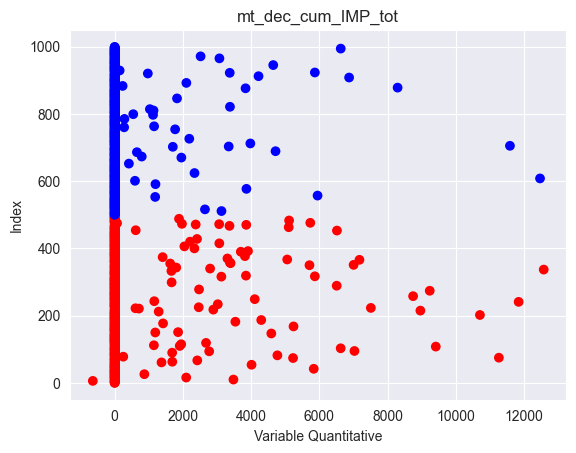

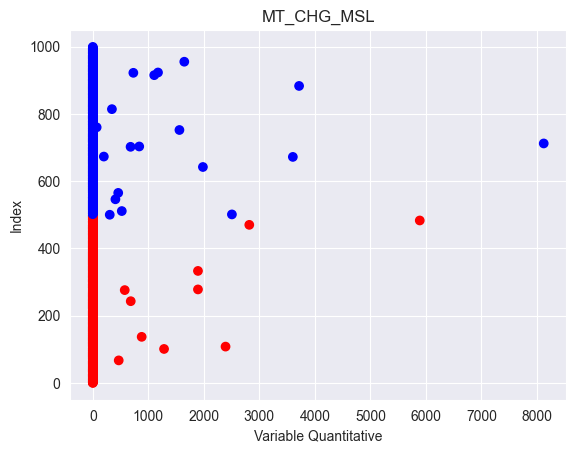

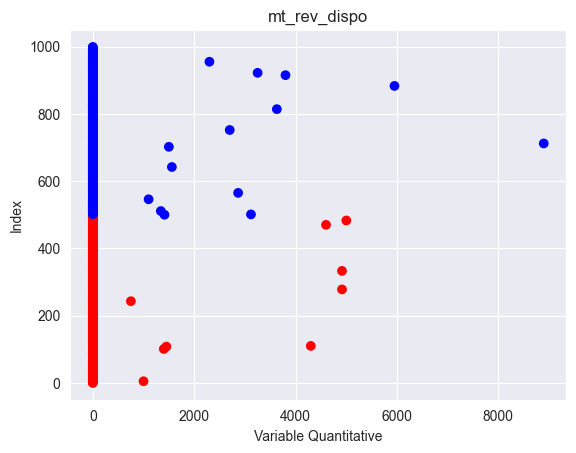

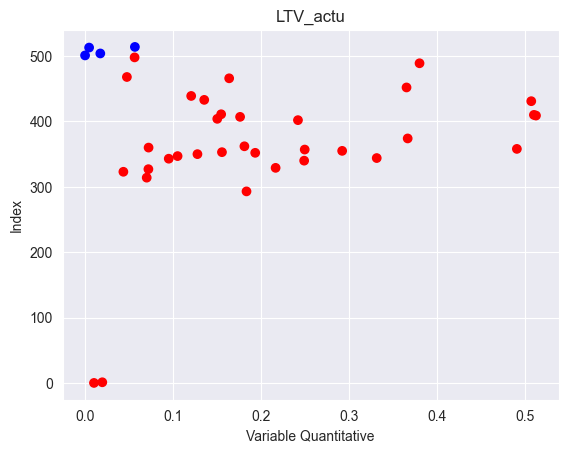

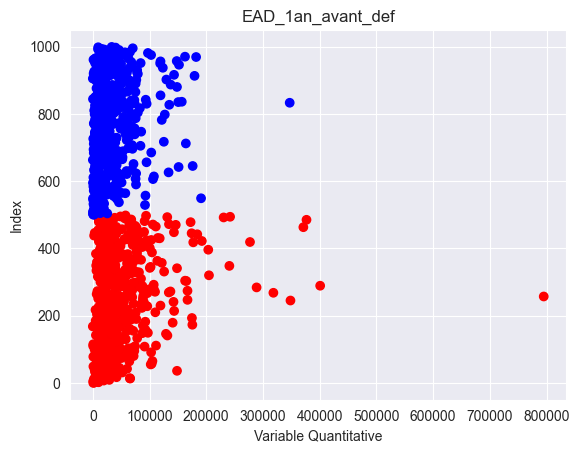

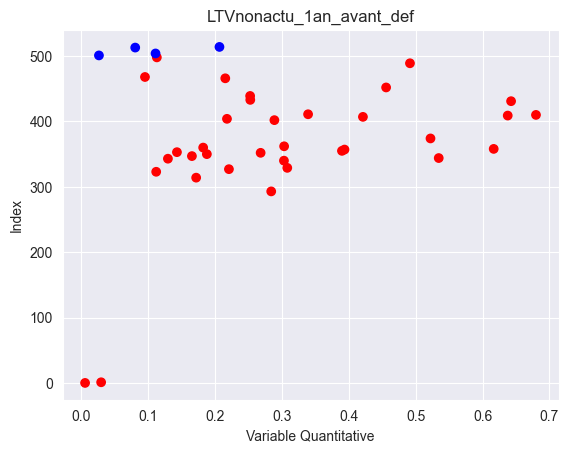

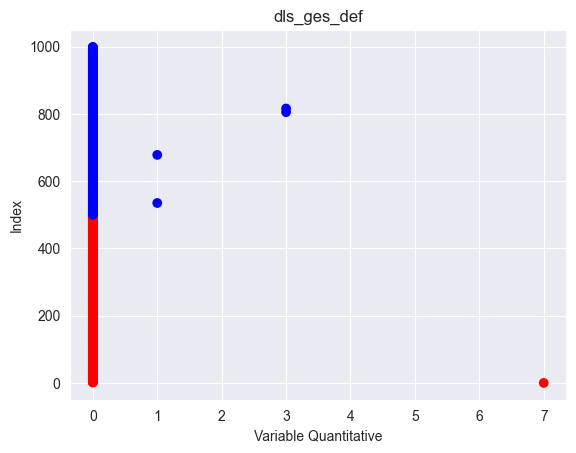

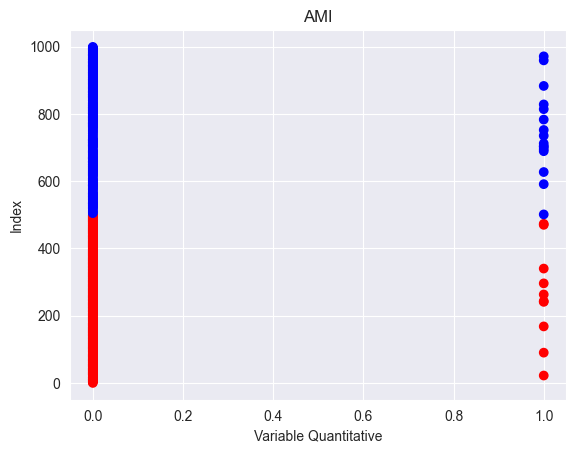

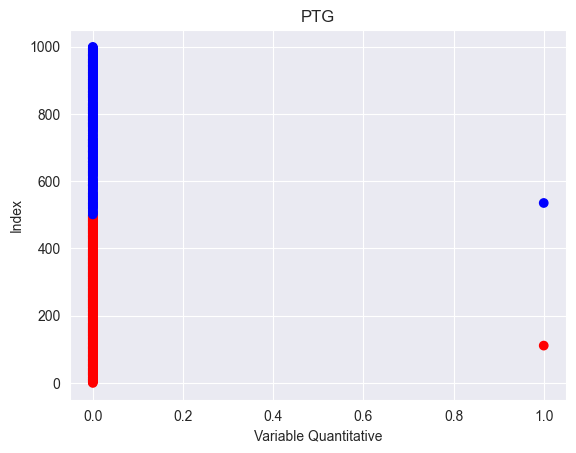

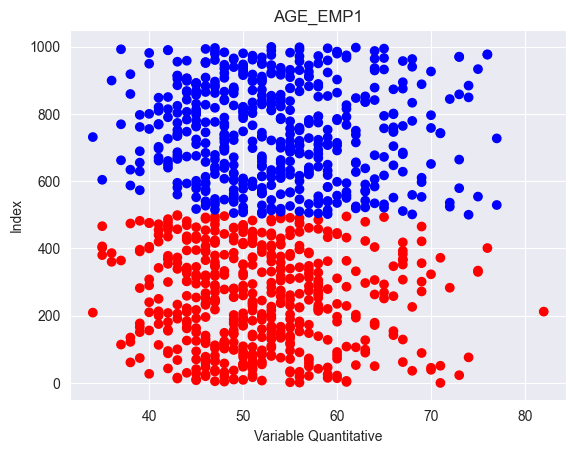

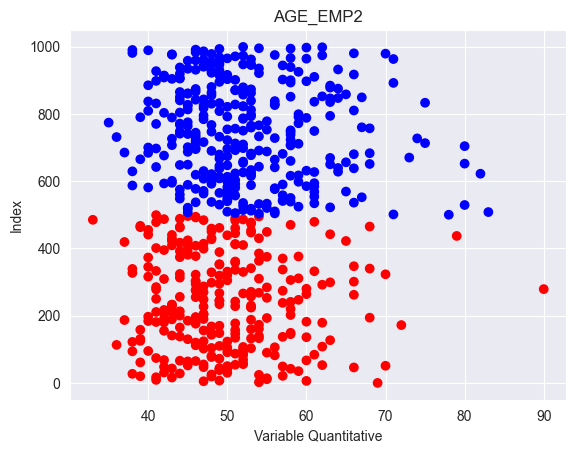

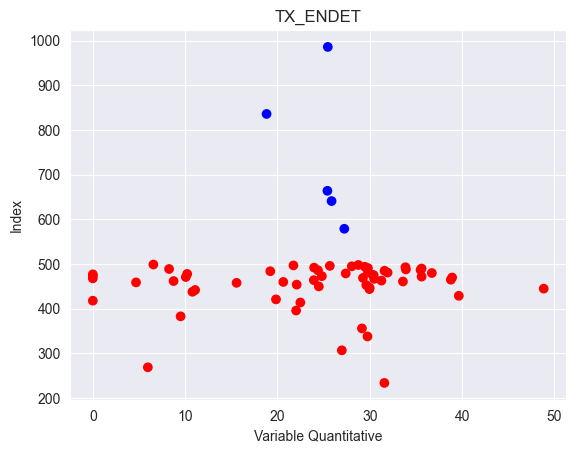

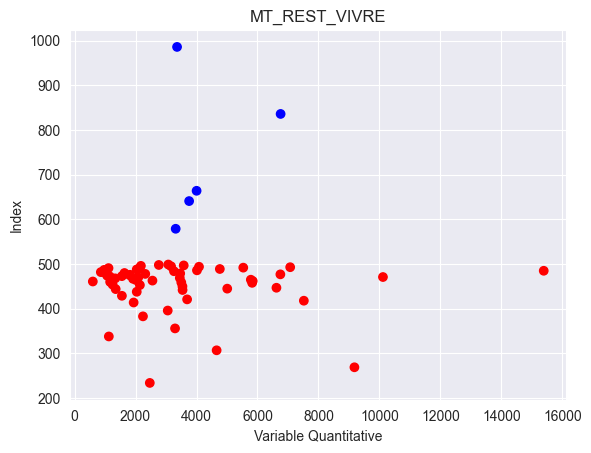

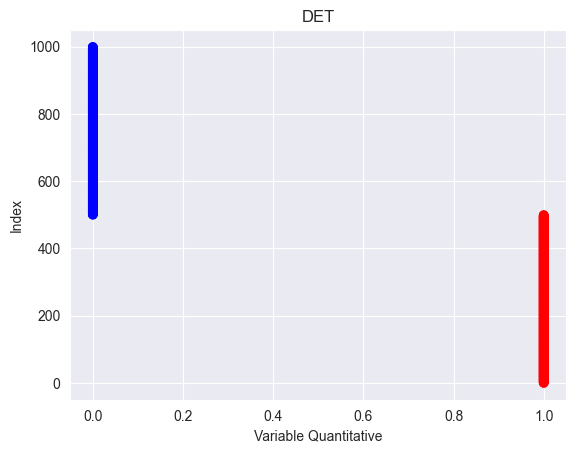

In [781]:
import matplotlib.pyplot as plt

df_det = df2[df2['DET'] == 1].iloc[:500,:]
df_cool = df2[df2['DET'] == 0].iloc[:500,:]
df3 = pd.concat([df_det,df_cool])

for col in df3.select_dtypes(include = 'number').columns : 
    if df3[col].nunique()>1 :
        colors = {1 : 'red', 0 : 'blue'}
        df3['Couleur'] = df3['DET'].map(colors)
        
        # Scatter plot
        plt.scatter(df3[col], range(len(df3)), c=df3['Couleur'], label=df3['DET'])
        
        # Ajouter des labels et un titre
        plt.xlabel('Variable Quantitative')
        plt.ylabel('Index')
        plt.title(col)
        
        # Afficher le plot
        plt.show()
    else:
        pass

In [782]:
df2['MT_REST_VIVRE'].isna().sum()

1956